In [1]:
import train
from analysis import performance

import matplotlib.pyplot as plt
import tools
import numpy as np
from task import generate_trials, rule_name, get_dist
%load_ext autoreload
%autoreload 2

/home/dburnham/miniconda3/envs/rnn_mult/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dburnham/miniconda3/envs/rnn_mult/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dburnham/miniconda3/envs/rnn_mult/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dburnham/miniconda3/envs/

In [2]:
# train.train(model_dir='laconeu_test', 
#             hp={'learning_rate': 0.001, 
#                 'n_rnn': 32,#512, 16384,8192,1024
#                 # 'w_rec_init': 'randgauss',#'randortho'
#                 # 'b_rec_init': 'uniform',
#                 'rule_strength': 1.0,
#                 'no_rule': False,
#                 'target_perf':0.8,
#                 'activation': 'softplus',
#                 'alpha':0.2},
#             ruleset='all',
#             rule_trains = ['fdanti', 'dm1'],
#             trainables='all')#,trainables='bias')

In [3]:
model_dirs = ['laconeu_contextdm1_contextdm2_32',
              'laconeu_delaydm1_dm1_32',
              'laconeu_dm1_contextdm1_32',
              'laconeu_dmcgo_dmcnogo_32',
              'laconeu_fdanti_dm1_32']

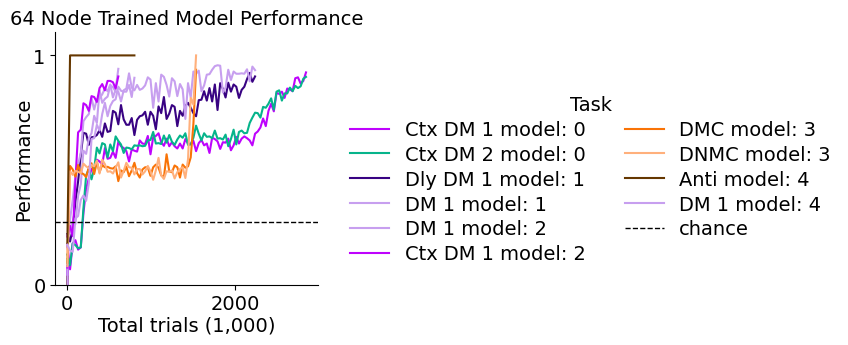

In [4]:

_rule_color = {
    'reactgo': 'green',
            'delaygo': 'olive',
            'fdgo': 'forest green',
            'reactanti': 'mustard',
            'delayanti': 'tan',
            'fdanti': 'brown',
            'dm1': 'lavender',
            'dm2': 'aqua',
            'contextdm1': 'bright purple',
            'contextdm2': 'green blue',
            'multidm': 'blue',
            'delaydm1': 'indigo',
            'delaydm2': 'grey blue',
            'contextdelaydm1': 'royal purple',
            'contextdelaydm2': 'dark cyan',
            'multidelaydm': 'royal blue',
            'dmsgo': 'red',
            'dmsnogo': 'rose',
            'dmcgo': 'orange',
            'dmcnogo': 'peach'
            }

dm_family = ['dm1', 'dm2', 'contextdm1', 'contextdm2', 'multidm', 'delaydm1', 'delaydm2', 'contextdelaydm1', 'contextdelaydm2', 'multidelaydm']
go_family = ['reactgo', 'delaygo', 'fdgo', 'dmsgo', 'dmsnogo', 'dmcgo', 'dmcnogo']
anti_family = ['reactanti', 'delayanti', 'fdanti']

rule_color = {k: 'xkcd:'+v for k, v in _rule_color.items()}

def plot_performanceprogress(model_dirs, title=None):

    fs = 14 # fontsize
    w = 7.5
    h = 4.2
    transparent = False

    fig = plt.figure(figsize=(w,h))
    ax = fig.add_axes([0.1,0.25,0.35,0.6])
    lines = list()
    labels = list()

    rules = []
    x_plots = []
    costs = []
    perfs = []
    model = []
    for i, model_dir in enumerate(model_dirs):
        # Plot Training Progress
        log = tools.load_log(model_dir)
        hp = tools.load_hp(model_dir)
        rules_mod = hp['rules']
        trials = log['trials']
        x_plot = np.array(trials)/1000.
        
        for rule in rules_mod:
            cost = np.log10(log['cost_'+rule])
            perf = log['perf_'+rule]
        
            rules.append(rule)
            x_plots.append(x_plot)
            costs.append(cost)
            perfs.append(perf)
            model.append(i)
            

    for i, rule in enumerate(rules):
        # line = ax1.plot(x_plot, np.log10(cost_tests[rule]),color=color_rules[i%26])
        # ax2.plot(x_plot, perf_tests[rule],color=color_rules[i%26])
        line = ax.plot(x_plots[i], costs[i],
                    color=rule_color[rule])
        ax.plot(x_plots[i], perfs[i], color=rule_color[rule])
        lines.append(line[0])
        label = rule_name[rule] + ' model: ' + str(model[i])
        labels.append(label)

    ax.tick_params(axis='both', which='major', labelsize=fs)
    line = ax.axhline(0.275, color='black', linestyle='--', linewidth=1.)
    lines.append(line)
    labels.append('chance')
    ax.set_ylim([0, 1.1])
    ax.set_xlabel('Total trials (1,000)',fontsize=fs, labelpad=2)
    ax.set_ylabel('Performance',fontsize=fs, labelpad=0)
    ax.locator_params(axis='x', nbins=3)
    ax.set_yticks([0,1])
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    if title is not None:
        ax.set_title(title,fontsize=fs)
    lg = fig.legend(lines, labels, title='Task',ncol=2,bbox_to_anchor=(0.47,0.5),
                    fontsize=fs,labelspacing=0.3,loc=6,frameon=False)
    plt.setp(lg.get_title(),fontsize=fs)
    # sfn = model_dir + '/figure/Performance_Progress'
    # plt.savefig(sfn, transparent=transparent)
    plt.show()

#get list of all file names with retrain_rnnbias_outputweights
import os

# model_dirs = ['retrain_rnnbias_outputweights_contextdm1',
#                'retrain_rnnbias_outputweights_contextdm2', 
#                'retrain_rnnbias_outputweights_multidm',
#                'retrain_rnnbias_outputweights_delaydm1',
#                'retrain_rnnbias_outputweights_delaydm2',
#                'retrain_rnnbias_outputweights_reactgo',
#                'retrain_rnnbias_outputweights_fdgo',
#                'retrain_rnnbias_outputweights_dmsgo',
#                'retrain_rnnbias_outputweights_dmcgo',
#                'train_all_params_contextdelaydm1']

#split model dirs into those that conntain
#dm, go, and anti
# dm_dirs = [d for d in model_dirs if d.split('_')[-1] in dm_family]
# go_dirs = [d for d in model_dirs if d.split('_')[-1] in go_family]
# anti_dirs = [d for d in model_dirs if d.split('_')[-1] in anti_family]

# plot_performanceprogress(dm_dirs, title='DM Family')
# plot_performanceprogress(go_dirs, title='GO Family')
# plot_performanceprogress(anti_dirs, title='ANTI Family')


plot_performanceprogress(model_dirs, title='64 Node Trained Model Performance')

The following code is for stimulating the trained networks

In [ ]:
#pass arbitrary inputs to the trained model
from network import Model
import tensorflow as tf
import copy

def stimulateTrainedModel(model_dir, n_rep = 16, mode='test'):
    hp = tools.load_hp(model_dir)
    hp_copy = copy.deepcopy(hp)
    hp_copy['rules'].append('random')
    model = Model(model_dir, hp)
    
    output_dict = {rn: None for rn in hp_copy['rules']}
    with tf.Session() as sess:
        model.restore()
        rules_ = copy.deepcopy(hp_copy['rules'])
        for rule_test in rules_:
            batch_size_test_rep = int(hp_copy['batch_size_test']/n_rep)
            rep_mat = {'x':[], 'h':[], 'y_hat':[]}
            for i_rep in range(n_rep):
                # trial = generate_trials(rule, hp, mode='test')
                trial = generate_trials(rule_test, hp_copy, mode, batch_size=batch_size_test_rep, 
                                        rule_strength=hp_copy['rule_strength'], no_rule=hp_copy['no_rule'])
                feed_dict = tools.gen_feed_dict(model, trial, hp_copy)
                x = trial.x
                h, y_hat = sess.run([model.h, model.y_hat], feed_dict=feed_dict)
                
                # x_flat = x.reshape(-1, x.shape[2])
                # h_flat = h.reshape(-1, h.shape[2])
                # y_hat_flat = y_hat.reshape(-1, y_hat.shape[2])

                rep_mat['x'].append(x)
                rep_mat['h'].append(h)
                rep_mat['y_hat'].append(y_hat)
                
            
            # for key in rep_mat.keys():
            #     rep_mat[key] = np.concatenate(rep_mat[key])
            output_dict[rule_test] = rep_mat
                
    return output_dict

all_mods = {}
for model_dir in model_dirs:
    output_dict = stimulateTrainedModel(model_dir, n_rep=4, mode='test')
    all_mods[model_dir] = output_dict

#save the stimulation results for each model
np.save('mods_32.npy', all_mods)


Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.


2025-01-15 06:34:28.210190: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2025-01-15 06:34:28.245380: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3000000000 Hz
2025-01-15 06:34:28.249516: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x55db984d4b50 executing computations on platform Host. Devices:
2025-01-15 06:34:28.249555: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>


Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from laconeu_contextdm1_contextdm2_32/model.ckpt


2025-01-15 06:34:28.506078: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x55db92b10a10 executing computations on platform CUDA. Devices:
2025-01-15 06:34:28.506127: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2025-01-15 06:34:28.506137: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (1): Quadro RTX 5000, Compute Capability 7.5
2025-01-15 06:34:28.506495: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1433] Found device 0 with properties: 
name: Quadro RTX 5000 major: 7 minor: 5 memoryClockRate(GHz): 1.815
pciBusID: 0000:af:00.0
totalMemory: 15.74GiB freeMemory: 15.62GiB
2025-01-15 06:34:28.506540: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1433] Found device 1 with properties: 
name: Quadro RTX 5000 major: 7 minor: 5 memoryClockRate(GHz): 1.815
pciBusID: 0000:d8:00.0
totalMemory: 15.74GiB freeMemory: 15.62GiB
2025-01-15 06:34:28.508784: I tensorflow/core/c

Model restored from file: laconeu_contextdm1_contextdm2_32/model.ckpt


2025-01-15 06:34:29.314302: I tensorflow/stream_executor/dso_loader.cc:152] successfully opened CUDA library libcublas.so.10.0 locally


INFO:tensorflow:Restoring parameters from laconeu_delaydm1_dm1_32/model.ckpt


2025-01-15 06:34:32.217207: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2025-01-15 06:34:32.217270: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2025-01-15 06:34:32.217275: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2025-01-15 06:34:32.217278: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2025-01-15 06:34:32.217281: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2025-01-15 06:34:32.217364: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2025-01-15 06:34:32.217602: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: laconeu_delaydm1_dm1_32/model.ckpt
INFO:tensorflow:Restoring parameters from laconeu_dm1_contextdm1_32/model.ckpt


2025-01-15 06:34:34.404371: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2025-01-15 06:34:34.404420: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2025-01-15 06:34:34.404425: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2025-01-15 06:34:34.404428: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2025-01-15 06:34:34.404431: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2025-01-15 06:34:34.404524: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2025-01-15 06:34:34.404734: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: laconeu_dm1_contextdm1_32/model.ckpt
INFO:tensorflow:Restoring parameters from laconeu_dmcgo_dmcnogo_32/model.ckpt


2025-01-15 06:34:36.897812: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2025-01-15 06:34:36.897859: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2025-01-15 06:34:36.897863: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2025-01-15 06:34:36.897867: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2025-01-15 06:34:36.897869: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2025-01-15 06:34:36.897965: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2025-01-15 06:34:36.898188: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: laconeu_dmcgo_dmcnogo_32/model.ckpt
INFO:tensorflow:Restoring parameters from laconeu_fdanti_dm1_32/model.ckpt


2025-01-15 06:34:38.813042: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2025-01-15 06:34:38.813097: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2025-01-15 06:34:38.813102: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2025-01-15 06:34:38.813106: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2025-01-15 06:34:38.813108: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2025-01-15 06:34:38.813208: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2025-01-15 06:34:38.813403: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: laconeu_fdanti_dm1_32/model.ckpt


In [11]:
out = np.load('mods_32.npy', allow_pickle=True).item()
out.keys()

dict_keys(['laconeu_contextdm1_contextdm2_32', 'laconeu_delaydm1_dm1_32', 'laconeu_dm1_contextdm1_32', 'laconeu_dmcgo_dmcnogo_32', 'laconeu_fdanti_dm1_32'])

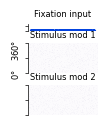

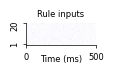

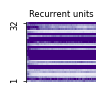

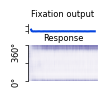

In [17]:
#plot some example stimu trials
def plotStimData(model_dir, data, rep=0):
    fontsize = 6
    x = data['x'][rep]
    h = data['h'][rep]
    y_hat = data['y_hat'][rep]
    
    hp = tools.load_hp(model_dir)
    n_eachring = hp['n_eachring']
    n_hidden = hp['n_rnn']

    # Plot Stimulus
    fig = plt.figure(figsize=(1.0,1.2))
    heights = np.array([0.06,0.25,0.25])
    for i in range(3):
        ax = fig.add_axes([0.2,sum(heights[i+1:]+0.1)+0.05,0.7,heights[i]])
        cmap = 'Purples'
        plt.xticks([])

        # Fixed style for these plots
        ax.tick_params(axis='both', which='major', labelsize=fontsize, width=0.5, length=2, pad=3)
        ax.spines["left"].set_linewidth(0.5)
        ax.spines["right"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

        if i == 0:
            plt.plot(x[:,0,0], color='xkcd:blue')
            plt.yticks([0, 1], ['', ''],rotation='vertical')
            plt.ylim([-0.1, 1.5])
            plt.title('Fixation input', fontsize=fontsize, y=0.9)
        elif i == 1:
            plt.imshow(x[:, 0, 1:1+n_eachring].T, aspect='auto', cmap=cmap,
                       vmin=0, vmax=1, interpolation='none',origin='lower')
            plt.yticks([0, (n_eachring-1)/2, n_eachring-1],
                       [r'0$\degree$', '', r'360$\degree$'],
                       rotation='vertical')
            plt.title('Stimulus mod 1', fontsize=fontsize, y=0.9)
        elif i == 2:
            plt.imshow(x[:, 0, 1+n_eachring:1+2*n_eachring].T, aspect='auto',
                       cmap=cmap, vmin=0, vmax=1,
                       interpolation='none', origin='lower')
            plt.yticks([0, (n_eachring-1)/2, n_eachring-1], ['', '', ''],
                       rotation='vertical')
            plt.title('Stimulus mod 2', fontsize=fontsize, y=0.9)
        ax.get_yaxis().set_label_coords(-0.12,0.5)
    
    # sfn = model_dir + '/figure/schematic_input.pdf'
    # plt.savefig(sfn,transparent=True)
    plt.show()

    # Plot Rule Inputs
    fig = plt.figure(figsize=(1.0, 0.5))
    ax = fig.add_axes([0.2,0.3,0.7,0.45])
    cmap = 'Purples'
    X = x[:, 0, 1+2*n_eachring:]
    plt.imshow(X.T, aspect='auto', vmin=0, vmax=1, cmap=cmap,
               interpolation='none', origin='lower')

    plt.xticks([0, X.shape[0]])
    ax.set_xlabel('Time (ms)', fontsize=fontsize, labelpad=-5)

    # Fixed style for these plots
    ax.tick_params(axis='both', which='major', labelsize=fontsize,
                   width=0.5, length=2, pad=3)
    ax.spines["left"].set_linewidth(0.5)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_linewidth(0.5)
    ax.spines["top"].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.yticks([0, X.shape[-1]-1], ['1',str(X.shape[-1])], rotation='vertical')
    plt.title('Rule inputs', fontsize=fontsize, y=0.9)
    ax.get_yaxis().set_label_coords(-0.12,0.5)

    #create save fig fn
    # sfn = model_dir + '/figure/schematic_rule.pdf'
    # plt.savefig(sfn,transparent=True)
    plt.show()


    # Plot Units
    fig = plt.figure(figsize=(1.0, 0.8))
    ax = fig.add_axes([0.2,0.1,0.7,0.75])
    cmap = 'Purples'
    plt.xticks([])
    # Fixed style for these plots
    ax.tick_params(axis='both', which='major', labelsize=fontsize,
                   width=0.5, length=2, pad=3)
    ax.spines["left"].set_linewidth(0.5)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.imshow(h[:, 0, :].T, aspect='auto', cmap=cmap, vmin=0, vmax=1,
               interpolation='none',origin='lower')
    plt.yticks([0,n_hidden-1],['1',str(n_hidden)],rotation='vertical')
    plt.title('Recurrent units', fontsize=fontsize, y=0.95)
    ax.get_yaxis().set_label_coords(-0.12,0.5)
    # sfn = model_dir + '/figure/schematic_units.pdf'
    # plt.savefig(sfn,transparent=True)
    plt.show()


    # Plot Outputs
    fig = plt.figure(figsize=(1.0,0.8))
    heights = np.array([0.1,0.45])+0.01
    for i in range(2):
        ax = fig.add_axes([0.2, sum(heights[i+1:]+0.15)+0.1, 0.7, heights[i]])
        cmap = 'Purples'
        plt.xticks([])

        # Fixed style for these plots
        ax.tick_params(axis='both', which='major', labelsize=fontsize,
                       width=0.5, length=2, pad=3)
        ax.spines["left"].set_linewidth(0.5)
        ax.spines["right"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

        if i == 0:
            plt.plot(y_hat[:,0,0],color='xkcd:blue')
            plt.yticks([0.05,0.8],['',''],rotation='vertical')
            plt.ylim([-0.1,1.1])
            plt.title('Fixation output', fontsize=fontsize, y=0.9)

        elif i == 1:
            plt.imshow(y_hat[:,0,1:].T, aspect='auto', cmap=cmap,
                       vmin=0, vmax=1, interpolation='none', origin='lower')
            plt.yticks([0, (n_eachring-1)/2, n_eachring-1],
                       [r'0$\degree$', '', r'360$\degree$'],
                       rotation='vertical')
            plt.xticks([])
            plt.title('Response', fontsize=fontsize, y=0.9)

        ax.get_yaxis().set_label_coords(-0.12,0.5)
    # sfn = model_dir + '/figure/schematic_output.pdf'
    # plt.savefig(sfn,transparent=True)
    plt.show()
    
rule = 'random'
data = out['laconeu_fdanti_dm1_32'][rule]
plotStimData('laconeu_fdanti_dm1_32', data)

In [1]:
# rule = 'fdanti'
# in_ = out['laconeu_fdanti_dm1_32'][rule]['x'][0].T
# h_ = out['laconeu_fdanti_dm1_32'][rule]['h'][0].T
# out_ = out['laconeu_fdanti_dm1_32'][rule]['y_hat'][0].T
# t_max = 1900
# t_min = 1800
# fig,ax = plt.subplots(3,1,figsize=(10,10))
# ax[0].imshow(in_[:, t_min:t_max])
# ax[0].set_title('Input')
# ax[1].imshow(h_[:, t_min:t_max])
# ax[1].set_title('Hidden')
# ax[2].imshow(out_[:, t_min:t_max])
# ax[2].set_title('Output');
# plt.show()